<a href="https://colab.research.google.com/github/roulupen/EVAAssignments/blob/master/Assignment-3/Assignment3_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

### Importing Keras library 

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Importing other required library

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Displaying the first image from the dataset

(60000, 28, 28)


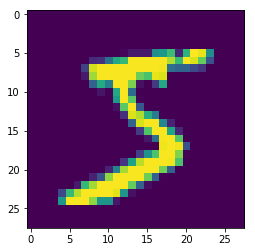

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Reshaping the train test dataset by defining number of channel for the input image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalizing the train and test data set by dividing 255, as 255 is the maximum value for a channel in an image and minimum is 0

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### displaying last 10 values from the output of train dataset

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### As this is a classification problem with 10 labels(0-9 numbers), so here we are converting the labels into hot encoding to use in the model prediction

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Displying the last 10 values from the output of train dataset after hot encoding

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Definding the CNN model layers


1.   #### 28x28x1     ->   (3x3x1) x 32           => 26x26x32
2.   #### 26x26x32   ->   (1x1x32) x 10         => 26x26x10 ( 1x1 convolution ro reduce the channel size)
3.   #### 26x26x10   ->   (26x26x10) x 10     => 1x1x10
4.   #### Using Flatten layer to convert the output into 1D array
5.   #### Using softmax activation function to get the final 10 label output for any given image



In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 28x28x1     ->   (3x3x1) x 32           => 26x26x32
model.add(Convolution2D(10, 1, activation='relu')) # 26x26x32   ->   (1x1x32) x 10         => 26x26x10 ( 1x1 convolution ro reduce the channel size)
model.add(Convolution2D(10, 26)) # 26x26x10   ->   (26x26x10) x 10     => 1x1x10
model.add(Flatten()) # Using Flatten layer to convert the output into 1D array
model.add(Activation('softmax')) # Using softmax activation function to get the final 10 label output for any given image

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


#### Displaying model summary 

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


#### Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### Train the model

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.2025 - acc: 0.9408
Epoch 2/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0736 - acc: 0.9774
Epoch 3/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0548 - acc: 0.9827
Epoch 4/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0429 - acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0338 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0269 - acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0210 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0168 - acc: 0.9945
Epoch 9/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0136 - acc: 0.9958
Epoch 10/10
60000/60000 [==================

#### Validate the model accuracy with test data

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

#### Printing the validation accuracy

In [15]:
print(score)

[0.08924596830063455, 0.9784]


### Predicting the test data outout using the model

In [0]:
y_pred = model.predict(X_test)

### Printing last 10 predicted(probability like) vs actual output 

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[3.6152528e-19 2.9134174e-18 5.6349519e-15 9.9325104e-10 1.4353791e-19
  8.9330106e-17 1.0835299e-28 1.0000000e+00 3.3940632e-13 2.5449945e-10]
 [2.5553473e-10 1.6082158e-11 9.9999905e-01 3.6272083e-10 3.4944875e-20
  4.4696209e-12 9.0596109e-07 8.4646547e-27 7.9857045e-11 2.5967477e-17]
 [1.4389177e-09 9.9995649e-01 2.7193867e-08 1.5246594e-10 1.6147731e-05
  4.1765214e-10 2.3205085e-10 1.3249624e-07 2.7175243e-05 4.3473846e-11]
 [1.0000000e+00 9.5206731e-19 6.9977473e-09 2.1071596e-14 5.1630385e-15
  3.1404414e-15 4.1555381e-08 1.6069725e-11 5.7918581e-10 1.1287368e-12]
 [1.2258020e-13 6.2273729e-19 9.7747232e-16 1.3239670e-14 1.0000000e+00
  3.2565897e-20 1.0169257e-16 2.2419786e-13 1.0273336e-10 4.9292032e-10]
 [4.3853080e-13 9.9998355e-01 7.5455558e-11 6.8226397e-12 2.4028122e-06
  9.2055041e-15 7.5436127e-15 1.1040062e-05 3.0337283e-06 4.8742680e-11]
 [1.2095960e-19 5.3087716e-16 6.3586375e-10 6.1033305e-14 9.9994659e-01
  2.2550176e-12 1.1973548e-15 3.1220935e-08 5.3240630e-05 

## New Model with less than 20k paramter and target validation accuracy > 99.4%

### Model defination

#### The model architecture is defined in line, here we are adding drop out layer before transition to make sure there is less gap betten train and test accuracy

In [18]:
from keras.layers import Activation, MaxPooling2D, Dropout
model_new = Sequential()

model_new.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26x26x10
model_new.add(Convolution2D(20, 3, 3, activation='relu')) # 26x26x10 -> (3x3x10) x 20 -> 24x24x20
model_new.add(Convolution2D(30, 3, 3, activation='relu')) # 26x26x20 -> (3x3x20) x 30 -> 22x22x30

model.add(Dropout(0.2)) # Dropping 0.2 percent of the neurons
model_new.add(MaxPooling2D(pool_size=(2, 2))) # 11x11x30
model_new.add(Convolution2D(10, 1, activation='relu')) # 11x11x30 -> (1x1x32) x10 -> 11 x 11 x 10

model_new.add(Convolution2D(16, 3, 3, activation='relu')) # 11x11x10 => (3x3x10) x 16 => 9x9x16
model_new.add(Convolution2D(32, 3, 3, activation='relu')) # 9x9x32 => (3x3x16) x 32 => 7x7x32

model.add(Dropout(0.2)) # Dropping 0.2 percent of the neurons
model_new.add(Convolution2D(10, 1, activation='relu')) # 7x7x32 => (1x1x32) x 10 => 7x7x10


model_new.add(Convolution2D(10, 7)) # 7x7x10 => (7x7x10) => 1x1x10
model_new.add(Flatten())
model_new.add(Activation('softmax'))
model_new.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 20)        1820      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 30)        5430      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 30)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 10)        310       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 16)          1456      
___________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]


In [0]:
model_new.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
model_new.fit(X_train, Y_train, batch_size=64, nb_epoch=25, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/25
60000/60000 [==============================] - 7s 110us/step - loss: 0.2365 - acc: 0.9287
Epoch 2/25
60000/60000 [==============================] - 6s 95us/step - loss: 0.0682 - acc: 0.9795
Epoch 3/25
60000/60000 [==============================] - 6s 92us/step - loss: 0.0527 - acc: 0.9841
Epoch 4/25
60000/60000 [==============================] - 5s 90us/step - loss: 0.0425 - acc: 0.9870
Epoch 5/25
60000/60000 [==============================] - 5s 91us/step - loss: 0.0375 - acc: 0.9885
Epoch 6/25
60000/60000 [==============================] - 5s 90us/step - loss: 0.0314 - acc: 0.9898
Epoch 7/25
60000/60000 [==============================] - 5s 89us/step - loss: 0.0281 - acc: 0.9909
Epoch 8/25
60000/60000 [==============================] - 5s 90us/step - loss: 0.0261 - acc: 0.9917
Epoch 9/25
60000/60000 [==============================] - 5s 90us/step - loss: 0.0231 - acc: 0.9925
Epoch 10/25
60000/60000 [==============================] - 5s 90us/step - loss: 0.0208 - acc: 0.993

#### Final test validation score of the new model

In [21]:
score_new = model_new.evaluate(X_test, Y_test, verbose=0)
print(score_new)

[0.0536958446854329, 0.9902]
